# House Price Prediction

In [1]:
import pandas as pd

In [2]:
house_data=pd.read_csv('train.csv')

In [3]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Checking the corelation between columns by drawing heatmap

In [4]:
import seaborn as sns

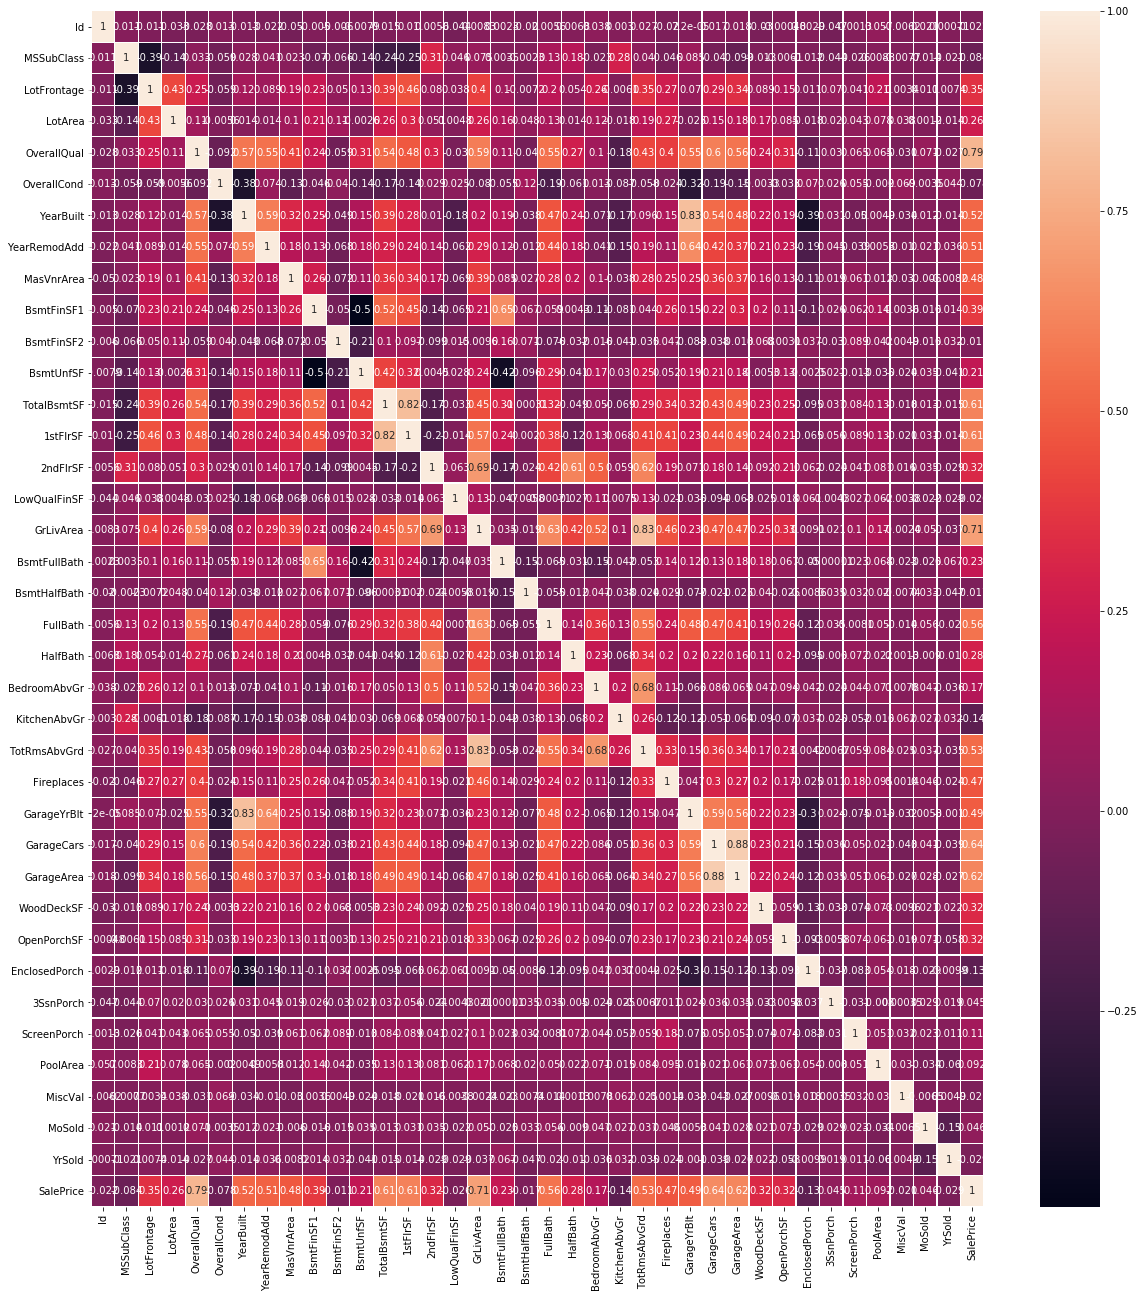

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,22))
sns.heatmap(house_data.corr(),linewidth=0.1,linecolor='white',annot=True)
plt.show()

In [6]:
correlation=house_data.corr()

In [7]:
correlation['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr


### Perfoming Bi-Variate analysis on Ms Zones and Sales Value

In [9]:
unique_mszones=house_data['MSZoning'].value_counts()

In [10]:
unique_mszones

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

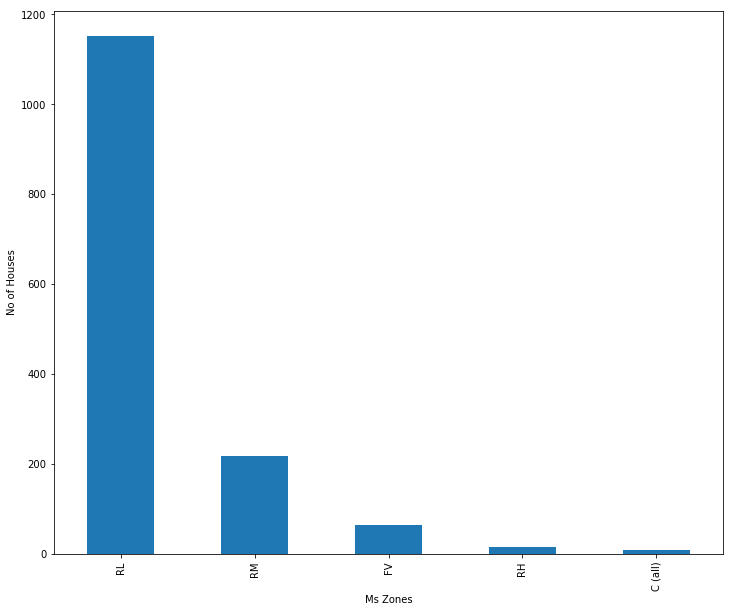

In [11]:
font_dict={
    'family':'serif',
    'size':18
}
plt.figure(figsize=(12,10))
unique_mszones.plot.bar()
plt.xlabel('Ms Zones')
plt.ylabel('No of Houses')
plt.show()

### We can see that most of the houses are in RL

## Let's see how the mean value of houses are in MS Zones

In [12]:
mean_sale_price=house_data.groupby('MSZoning').SalePrice.mean()

In [13]:
mean_sale_price

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64

In [14]:
mean_sale_price.sort_values(ascending=False)

MSZoning
FV         214014.061538
RL         191004.994787
RH         131558.375000
RM         126316.830275
C (all)     74528.000000
Name: SalePrice, dtype: float64

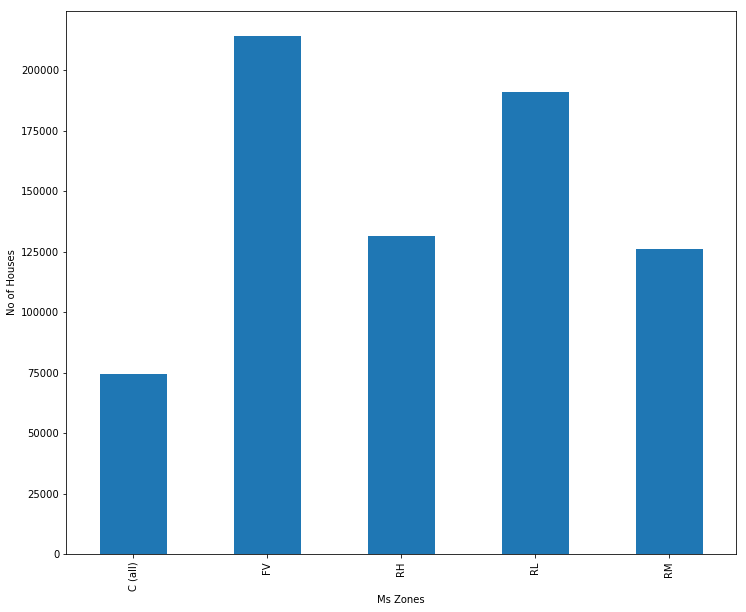

In [15]:
font_dict={
    'family':'serif',
    'size':18
}
plt.figure(figsize=(12,10))
mean_sale_price.plot.bar()
plt.xlabel('Ms Zones')
plt.ylabel('No of Houses')
plt.show()

## Checking All categorical Variable

In [16]:
import numpy as np
house_data.describe(include=[np.object])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## Making new column for categorical variable from the original 

In [17]:
house_data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [18]:
house_data['RL']=house_data['MSZoning'][house_data['MSZoning']=='RL']

In [19]:
house_data['RL'].head()

0    RL
1    RL
2    RL
3    RL
4    RL
Name: RL, dtype: object

In [20]:
house_data['RL'][house_data['RL']=='RL']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
house_data['RL'][house_data['RL'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
house_data.RL.head()

0    1
1    1
2    1
3    1
4    1
Name: RL, dtype: object

In [23]:
house_data['RM']=house_data['MSZoning'][house_data['MSZoning']=='RM']

In [24]:
house_data['RM'][house_data['RM']=='RM']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
house_data['RM'][house_data['RM'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
house_data['FV']=house_data['MSZoning'][house_data['MSZoning']=='FV']

In [27]:
house_data['RH']=house_data['MSZoning'][house_data['MSZoning']=='RH']

In [28]:
house_data['C']=house_data['MSZoning'][house_data['MSZoning']=='C']

In [29]:
house_data['FV'][house_data['FV']=='FV']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
house_data['RH'][house_data['RH']=='RH']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
house_data['C'][house_data['C']=='C']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [32]:
house_data['FV'][house_data['FV'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
house_data['RH'][house_data['RH'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
house_data['C'][house_data['C'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
house_data.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

### Dividing the lotshapes in 4 column

In [36]:
house_data['Reg']=house_data['LotShape'][house_data['LotShape']=='Reg']

In [37]:
house_data['IR1']=house_data['LotShape'][house_data['LotShape']=='IR1']

In [38]:
house_data['IR2']=house_data['LotShape'][house_data['LotShape']=='IR2']

In [39]:
house_data['IR3']=house_data['LotShape'][house_data['LotShape']=='IR3']

In [40]:
house_data['Reg'][house_data['Reg']=='Reg']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [41]:
house_data['IR1'][house_data['IR1']=='IR1']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [42]:
house_data['IR2'][house_data['IR2']=='IR2']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [43]:
house_data['IR3'][house_data['IR3']=='IR3']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [44]:
house_data['Reg'][house_data['Reg'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [45]:
house_data['IR1'][house_data['IR1'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [46]:
house_data['IR2'][house_data['IR2'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [47]:
house_data['IR3'][house_data['IR3'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## Perfoming analysis on all columns for outliers and cleaning it 

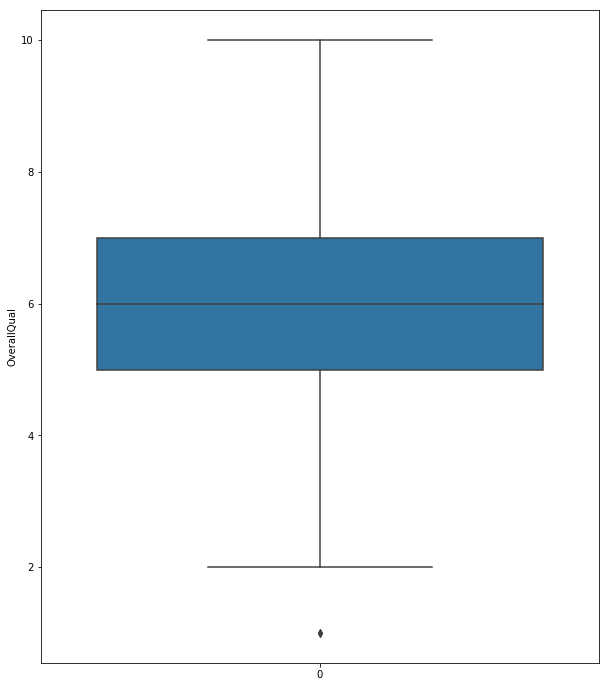

In [48]:
plt.figure(figsize=(10,12))
plt.ylabel('OverallQual')
sns.boxplot(data=house_data.OverallQual)
plt.show()

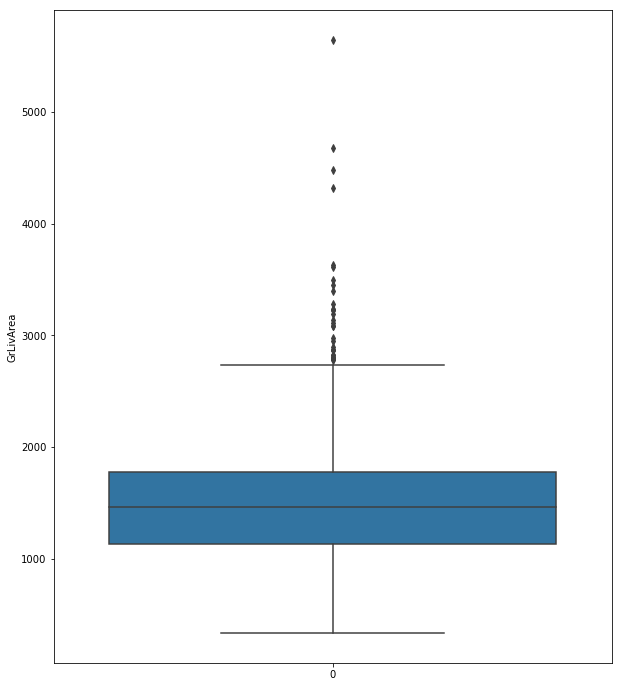

In [49]:
plt.figure(figsize=(10,12))
plt.ylabel('GrLivArea')
sns.boxplot(data=house_data.GrLivArea)
plt.show()

### Removing Outliers

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


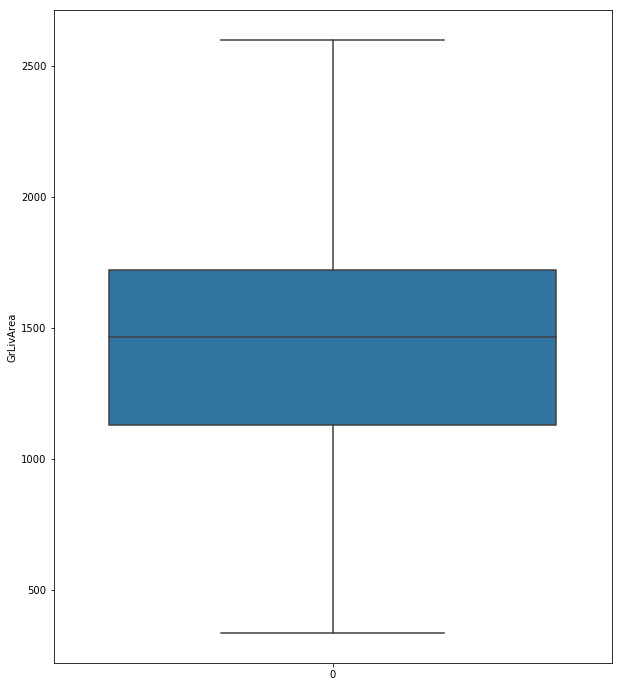

In [50]:
plt.figure(figsize=(10,12))
plt.ylabel('GrLivArea')
house_data['GrLivArea'][house_data['GrLivArea']>2600]=house_data.GrLivArea.mean()
sns.boxplot(data=house_data.GrLivArea)
plt.show()

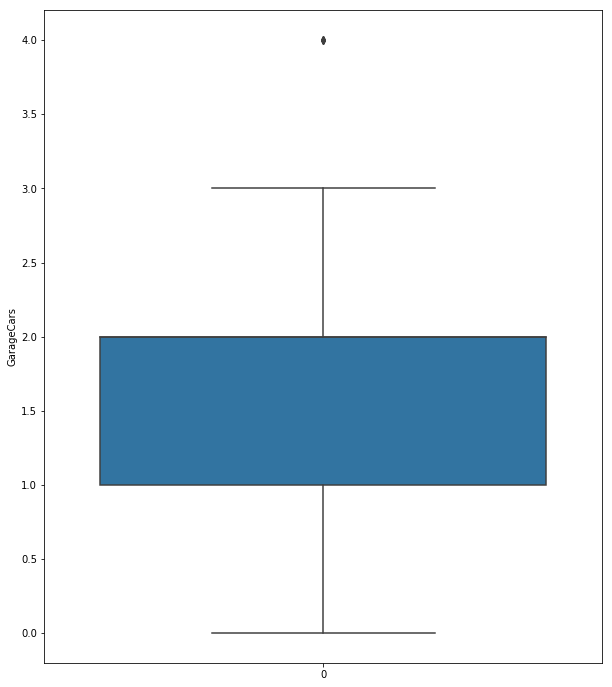

In [51]:
plt.figure(figsize=(10,12))
plt.ylabel('GarageCars')
sns.boxplot(data=house_data.GarageCars)
plt.show()

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


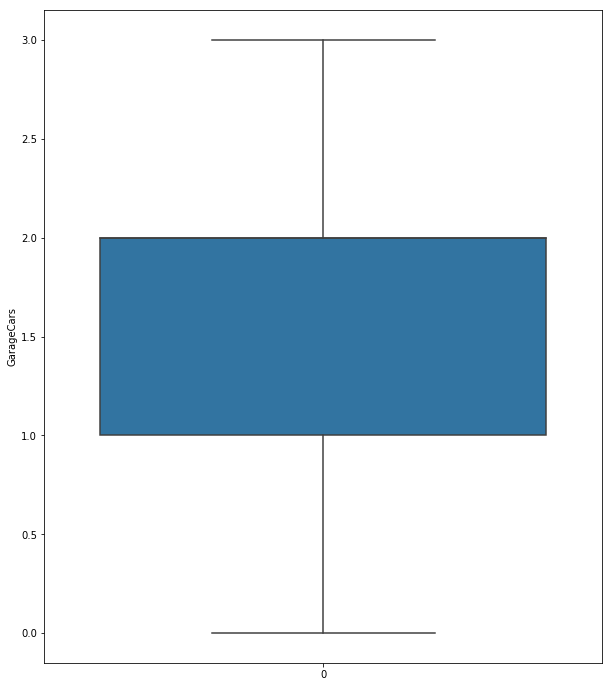

In [52]:
plt.figure(figsize=(10,12))
plt.ylabel('GarageCars')
house_data['GarageCars'][house_data['GarageCars']>3]=house_data.GarageCars.mean()
sns.boxplot(data=house_data.GarageCars)
plt.show()

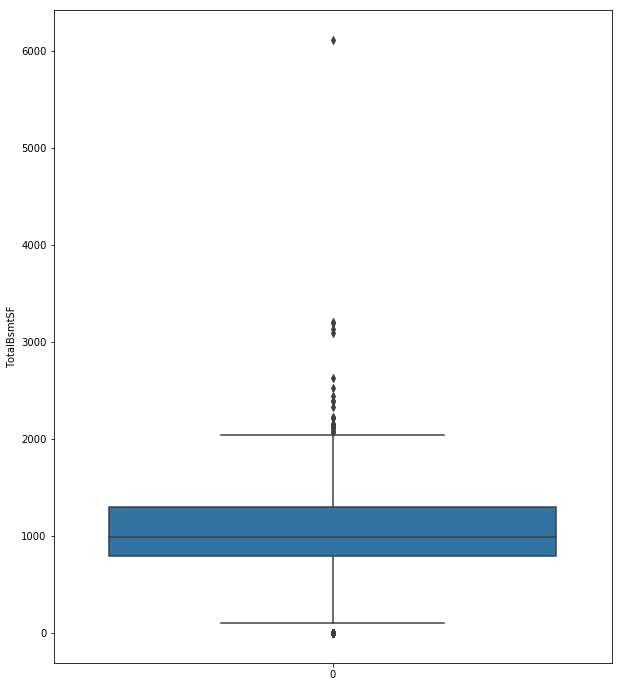

In [53]:
plt.figure(figsize=(10,12))
plt.ylabel('TotalBsmtSF')
sns.boxplot(data=house_data.TotalBsmtSF)
plt.show()

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


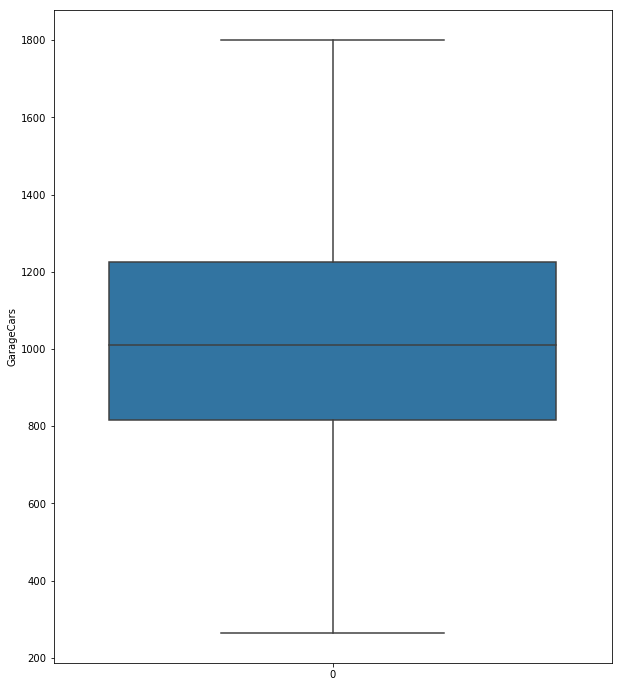

In [54]:
plt.figure(figsize=(10,12))
plt.ylabel('GarageCars')
house_data['TotalBsmtSF'][house_data['TotalBsmtSF']>1800]=house_data.TotalBsmtSF.mean()
house_data['TotalBsmtSF'][house_data['TotalBsmtSF']<230]=house_data.TotalBsmtSF.mean()
sns.boxplot(data=house_data.TotalBsmtSF)
plt.show()

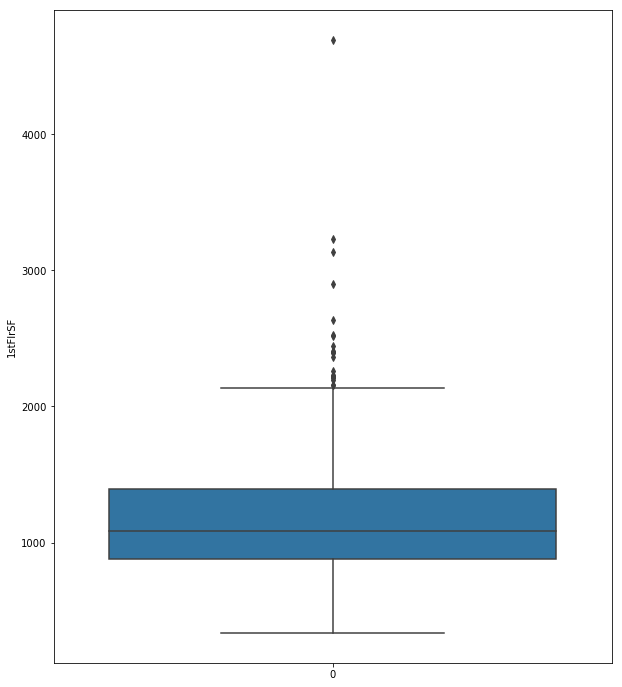

In [55]:
plt.figure(figsize=(10,12))
plt.ylabel('1stFlrSF')
sns.boxplot(data=house_data['1stFlrSF'])
plt.show()

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


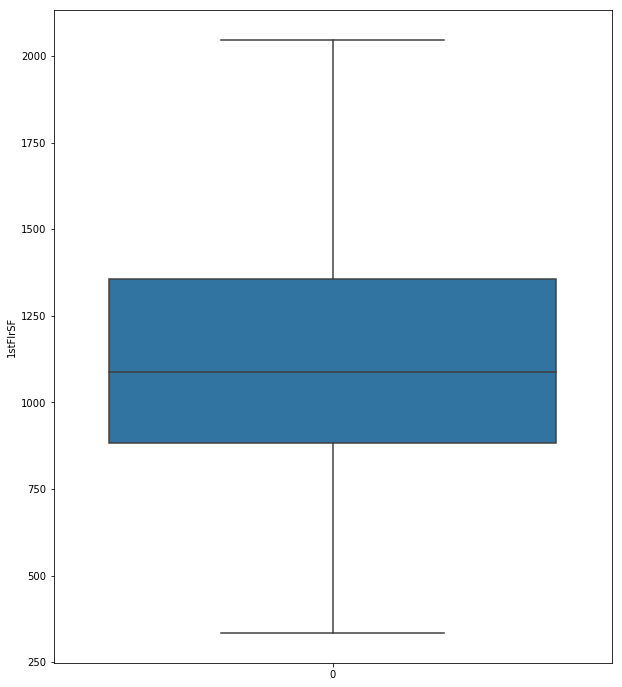

In [56]:
plt.figure(figsize=(10,12))
plt.ylabel('1stFlrSF')
house_data['1stFlrSF'][house_data['1stFlrSF']>2050]=house_data['1stFlrSF'].mean()
sns.boxplot(data=house_data['1stFlrSF'])
plt.show()

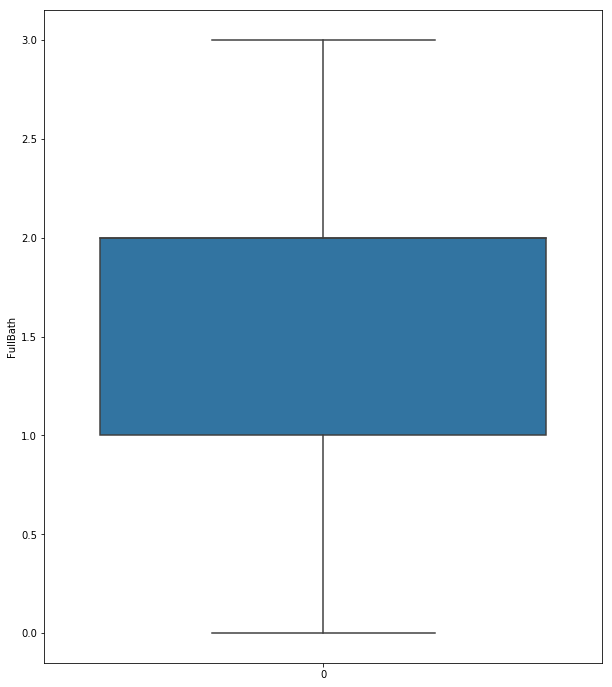

In [57]:
plt.figure(figsize=(10,12))
plt.ylabel('FullBath')
sns.boxplot(data=house_data['FullBath'])
plt.show()

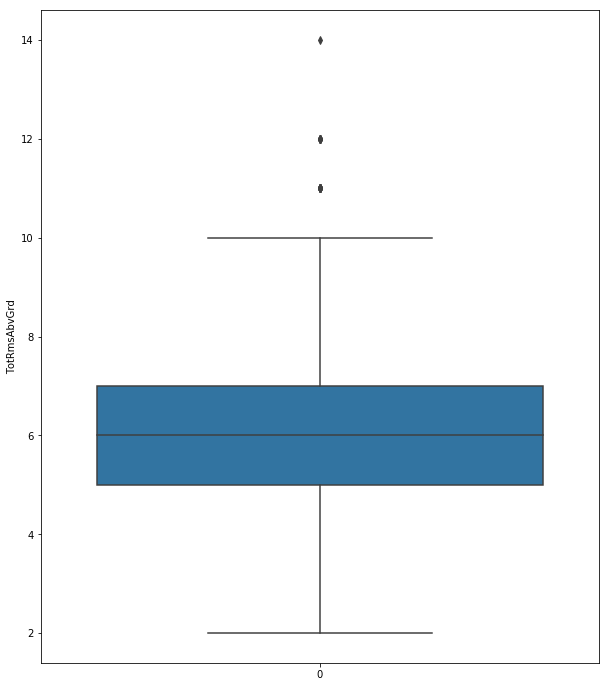

In [58]:
plt.figure(figsize=(10,12))
plt.ylabel('TotRmsAbvGrd')
sns.boxplot(data=house_data['TotRmsAbvGrd'])
plt.show()

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


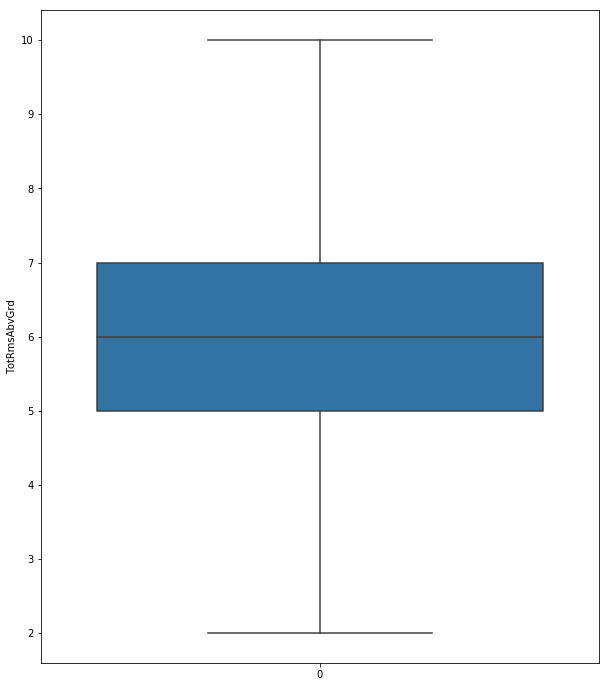

In [59]:
plt.figure(figsize=(10,12))
plt.ylabel('TotRmsAbvGrd')
house_data['TotRmsAbvGrd'][house_data['TotRmsAbvGrd']>10]=house_data.TotRmsAbvGrd.mean()
sns.boxplot(data=house_data['TotRmsAbvGrd'])
plt.show()

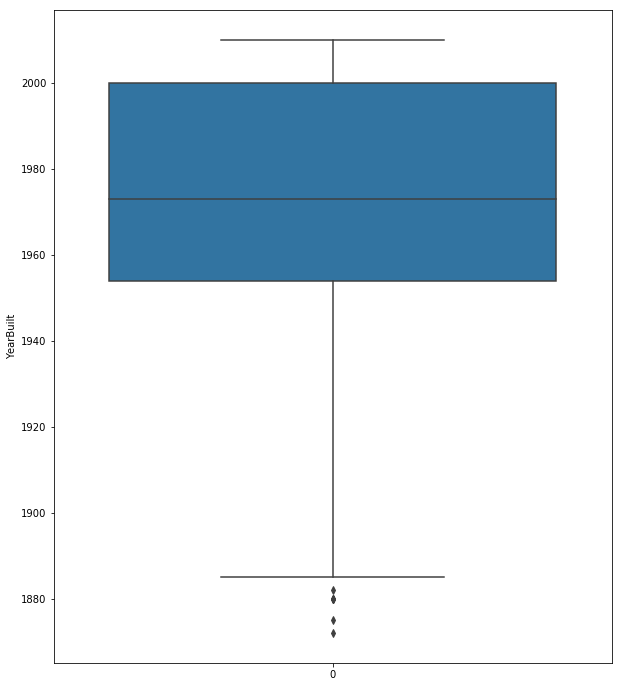

In [60]:
plt.figure(figsize=(10,12))
plt.ylabel('YearBuilt')
sns.boxplot(data=house_data['YearBuilt'])
plt.show()

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


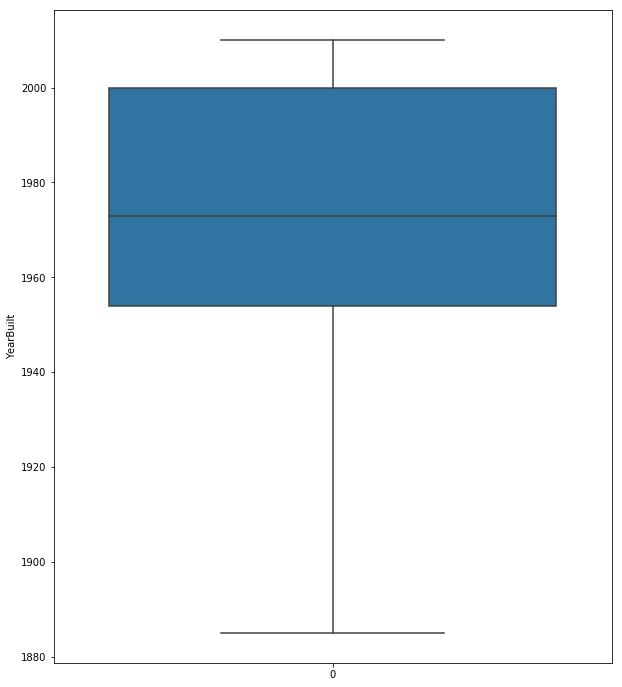

In [61]:
plt.figure(figsize=(10,12))
plt.ylabel('YearBuilt')
house_data['YearBuilt'][house_data['YearBuilt']<1885]=house_data.YearBuilt.mean()
sns.boxplot(data=house_data['YearBuilt'])
plt.show()

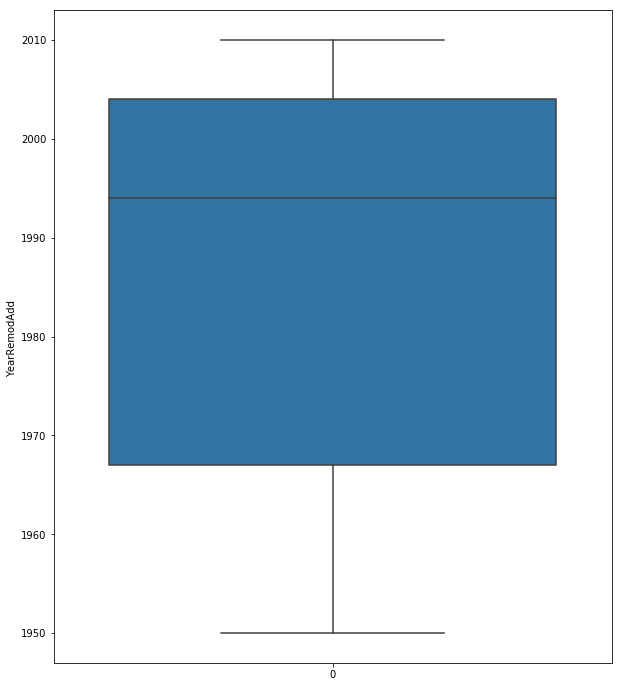

In [62]:
plt.figure(figsize=(10,12))
plt.ylabel('YearRemodAdd ')
sns.boxplot(data=house_data['YearRemodAdd'])
plt.show()

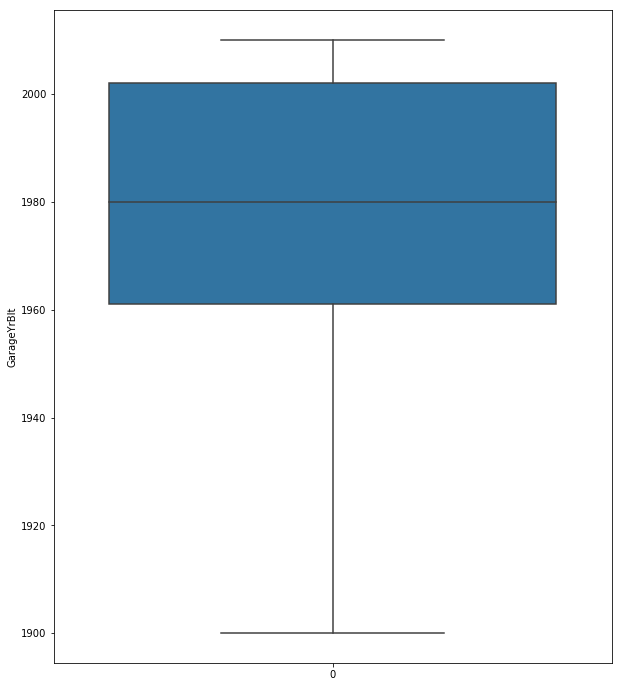

In [63]:
plt.figure(figsize=(10,12))
plt.ylabel('GarageYrBlt')
sns.boxplot(data=house_data['GarageYrBlt'])
plt.show()

In [64]:
house_data.describe(include=[np.object])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,SaleCondition,RL,RM,FV,RH,C,Reg,IR1,IR2,IR3
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,2,2,2,2,1,2,2,2,2
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Normal,1,0,0,0,0,1,0,0,0
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,1198,1151,1242,1395,1444,1460,925,976,1419,1450


In [65]:
house_data.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [66]:
house_data['Normal']=house_data['SaleCondition'][house_data['SaleCondition']=='Normal']

In [67]:
house_data['Normal'][house_data['Normal']=='Normal']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [68]:
house_data['Normal'][house_data['Normal'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [69]:
house_data['Partial']=house_data['SaleCondition'][house_data['SaleCondition']=='Partial']

In [70]:
house_data['Partial'][house_data['Partial']=='Partial']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [71]:
house_data['Partial'][house_data['Partial'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [72]:
house_data['Abnorml']=house_data['SaleCondition'][house_data['SaleCondition']=='Abnorml']

In [73]:
house_data['Abnorml'][house_data['Abnorml']=='Abnorml']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [74]:
house_data['Abnorml'][house_data['Abnorml'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [75]:
house_data['Family']=house_data['SaleCondition'][house_data['SaleCondition']=='Family']

In [76]:
house_data['Family'][house_data['Family']=='Family']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [77]:
house_data['Family'][house_data['Family'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [78]:
house_data['Alloca']=house_data['SaleCondition'][house_data['SaleCondition']=='Alloca']

In [79]:
house_data['Alloca'][house_data['Alloca']=='Alloca']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [80]:
house_data['Alloca'][house_data['Alloca'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [81]:
house_data['AdjLand']=house_data['SaleCondition'][house_data['SaleCondition']=='AdjLand']

In [82]:
house_data['AdjLand'][house_data['AdjLand']=='AdjLand']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [83]:
house_data['AdjLand'][house_data['AdjLand'].isnull()]=0
house_data.SaleCondition.value_counts()

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

# Making Data Ready for training 

In [84]:
new_data=house_data[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','RL','RM','RH','Reg','IR1','Normal','Partial']]

In [85]:
output_data=house_data['SalePrice']

In [86]:
new_data.isnull().sum()

OverallQual       0
GrLivArea         0
GarageCars        0
TotalBsmtSF       0
1stFlrSF          0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
YearRemodAdd      0
GarageYrBlt      81
MasVnrArea        8
Fireplaces        0
BsmtFinSF1        0
LotFrontage     259
WoodDeckSF        0
2ndFlrSF          0
RL                0
RM                0
RH                0
Reg               0
IR1               0
Normal            0
Partial           0
dtype: int64

## Removing null values if found any in any column

In [87]:
from sklearn.preprocessing import Imputer 

In [88]:
import numpy as np
new_data.isnull().sum().describe(include=[np.object])
imputer=Imputer(missing_values=np.nan,strategy='most_frequent')

In [89]:
new_data.isnull().sum()

OverallQual       0
GrLivArea         0
GarageCars        0
TotalBsmtSF       0
1stFlrSF          0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
YearRemodAdd      0
GarageYrBlt      81
MasVnrArea        8
Fireplaces        0
BsmtFinSF1        0
LotFrontage     259
WoodDeckSF        0
2ndFlrSF          0
RL                0
RM                0
RH                0
Reg               0
IR1               0
Normal            0
Partial           0
dtype: int64

In [90]:
new_data['GarageYrBlt'][new_data['GarageYrBlt'].isnull()]=new_data.GarageYrBlt.mean()

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Ankit Verma\Anaconda3\lib\site-packages\pandas\core\generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Ankit Verma\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [91]:
new_data['LotFrontage'][new_data['LotFrontage'].isnull()]=new_data.LotFrontage.mean()

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Ankit Verma\Anaconda3\lib\site-packages\pandas\core\generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Ankit Verma\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [92]:
new_data.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
MasVnrArea      8
Fireplaces      0
BsmtFinSF1      0
LotFrontage     0
WoodDeckSF      0
2ndFlrSF        0
RL              0
RM              0
RH              0
Reg             0
IR1             0
Normal          0
Partial         0
dtype: int64

In [93]:
new_data['MasVnrArea'][new_data['MasVnrArea'].isnull()]=new_data.MasVnrArea.mean()

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Ankit Verma\Anaconda3\lib\site-packages\pandas\core\generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Ankit Verma\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [94]:
new_data.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
MasVnrArea      0
Fireplaces      0
BsmtFinSF1      0
LotFrontage     0
WoodDeckSF      0
2ndFlrSF        0
RL              0
RM              0
RH              0
Reg             0
IR1             0
Normal          0
Partial         0
dtype: int64

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X,x_test,Y,y_test=train_test_split(new_data,output_data,test_size=0.3,random_state=42)

In [97]:
X.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,...,LotFrontage,WoodDeckSF,2ndFlrSF,RL,RM,RH,Reg,IR1,Normal,Partial
135,7,1682.0,2.0,1304.000000,1682.0,2,7.0,1970.0,1970,1970.0,...,80.0,98,0,1,0,0,1,0,1,0
1452,5,1072.0,2.0,547.000000,1072.0,1,5.0,2005.0,2005,2005.0,...,35.0,0,0,0,1,0,1,0,1,0
762,7,1547.0,2.0,756.000000,764.0,2,7.0,2009.0,2009,2009.0,...,72.0,169,783,0,0,0,1,0,1,0
932,9,1905.0,3.0,1057.429452,1905.0,2,8.0,2006.0,2006,2006.0,...,84.0,0,0,1,0,0,0,1,1,0
435,7,1661.0,2.0,799.000000,827.0,2,6.0,1996.0,1996,1996.0,...,43.0,158,834,1,0,0,0,0,1,0


# Import Test Data

In [98]:
test_data=pd.read_csv('test.csv')

In [99]:
test_data.GarageCars.value_counts().head()

2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
Name: GarageCars, dtype: int64

In [100]:
test_data.TotalBsmtSF.value_counts().head()

0.0      41
864.0    39
960.0    13
546.0    12
672.0    12
Name: TotalBsmtSF, dtype: int64

In [101]:
test_data.BsmtFinSF1.value_counts().head()

0.0      462
24.0      15
276.0      6
602.0      6
300.0      5
Name: BsmtFinSF1, dtype: int64

## Creating Additional columns that we created for training data 

In [102]:
test_data['GarageYrBlt'][test_data['GarageYrBlt'].isnull()]=test_data.GarageYrBlt.mean()

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [103]:
test_data['LotFrontage'][test_data['LotFrontage'].isnull()]=test_data.LotFrontage.mean()

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [104]:
test_data['MasVnrArea'][test_data['MasVnrArea'].isnull()]=test_data.MasVnrArea.mean()

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [105]:
test_data['GarageCars'][test_data['GarageCars'].isnull()]=2.0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [106]:
test_data['TotalBsmtSF'][test_data['TotalBsmtSF'].isnull()]=864.0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [107]:
test_data['BsmtFinSF1'][test_data['BsmtFinSF1'].isnull()]=24

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [108]:
test_data['RL']=test_data['MSZoning'][test_data['MSZoning']=='RL']

In [109]:
test_data['RL'][test_data['RL']=='RL']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [110]:
test_data['RL'][test_data['RL'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [111]:
test_data['RM']=test_data['MSZoning'][test_data['MSZoning']=='RM']

In [112]:
test_data['RM'][test_data['RM']=='RM']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [113]:
test_data['RM'][test_data['RM'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [114]:
test_data['Reg']=test_data['LotShape'][test_data['LotShape']=='Reg']

In [115]:
test_data['IR1']=test_data['LotShape'][test_data['LotShape']=='IR1']

In [116]:
test_data['IR2']=test_data['LotShape'][test_data['LotShape']=='IR2']

In [117]:
test_data['IR3']=test_data['LotShape'][test_data['LotShape']=='IR3']

In [118]:
test_data['Reg'][test_data['Reg']=='Reg']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [119]:
test_data['IR1'][test_data['IR1']=='IR1']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [120]:
test_data['IR2'][test_data['IR2']=='IR2']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [121]:
test_data['IR3'][test_data['IR3']=='IR3']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [122]:
test_data['Reg'][test_data['Reg'].isnull()]=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [123]:
test_data['IR1'][test_data['IR1'].isnull()]=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [124]:
test_data['IR2'][test_data['IR2'].isnull()]=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [125]:
test_data['IR3'][test_data['IR3'].isnull()]=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [126]:
test_data.MSZoning.value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [127]:
test_data['RH']=test_data['MSZoning'][test_data['MSZoning']=='RH']

In [128]:
test_data['FV']=test_data['MSZoning'][test_data['MSZoning']=='FV']

In [129]:
test_data['C']=test_data['MSZoning'][test_data['MSZoning']=='C']

In [130]:
test_data['RH'][test_data['RH']=='RH']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [131]:
test_data['FV'][test_data['FV']=='FV']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [132]:
test_data['C'][test_data['C']=='C']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [133]:
test_data['RH'][test_data['RH'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [134]:
test_data['FV'][test_data['FV'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [135]:
test_data['C'][test_data['C'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [136]:
house_data.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [137]:
test_data['Normal']=test_data['SaleCondition'][test_data['SaleCondition']=='Normal']

In [138]:
test_data['Partial']=test_data['SaleCondition'][test_data['SaleCondition']=='Partial']

In [139]:
test_data['Abnorml']=test_data['SaleCondition'][test_data['SaleCondition']=='Abnorml']

In [140]:
test_data['Family']=test_data['SaleCondition'][test_data['SaleCondition']=='Family']

In [141]:
test_data['Alloca']=test_data['SaleCondition'][test_data['SaleCondition']=='Alloca']

In [142]:
test_data['AdjLand']=test_data['SaleCondition'][test_data['SaleCondition']=='AdjLand']

In [143]:
test_data['Normal'][test_data['Normal']=='Normal']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [144]:
test_data['Partial'][test_data['Partial']=='Partial']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [145]:
test_data['Abnorml'][test_data['Abnorml']=='Abnorml']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [146]:
test_data['Family'][test_data['Family']=='Family']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [147]:
test_data['Alloca'][test_data['Alloca']=='Alloca']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [148]:
test_data['AdjLand'][test_data['AdjLand']=='AdjLand']=1

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [149]:
test_data['Normal'][test_data['Normal'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [150]:
test_data['Partial'][test_data['Partial'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [151]:
test_data['Abnorml'][test_data['Abnorml'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [152]:
test_data['Family'][test_data['Family'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [153]:
test_data['Alloca'][test_data['Alloca'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [154]:
test_data['AdjLand'][test_data['AdjLand'].isnull()]=0

C:\Users\Ankit Verma\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [155]:
test_data.describe(include=[np.object])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,IR3,RH,FV,C,Normal,Partial,Abnorml,Family,Alloca,AdjLand
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,...,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459
unique,5,2,2,4,4,1,5,3,25,9,...,1,2,2,1,2,2,2,2,2,2
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,1,0,0,0,1,0,0,0,0,0
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,...,1459,1449,1385,1459,1204,1339,1370,1433,1447,1451


In [156]:
test_data.Street.value_counts()

Pave    1453
Grvl       6
Name: Street, dtype: int64

In [157]:
test_data.LotShape.value_counts()

Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64

In [158]:
test

NameError: name 'test' is not defined

In [159]:
news_data=test_data[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','RL','RM','RH','Reg','IR1','Normal','Partial']]
news_data.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
MasVnrArea      0
Fireplaces      0
BsmtFinSF1      0
LotFrontage     0
WoodDeckSF      0
2ndFlrSF        0
RL              0
RM              0
RH              0
Reg             0
IR1             0
Normal          0
Partial         0
dtype: int64

# K Nearest Neighbour

In [160]:
from sklearn.neighbors import KNeighborsRegressor

In [161]:
model=KNeighborsRegressor(n_neighbors=10)

In [162]:
model.fit(X,Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [163]:
prediction=model.predict(x_test)

In [164]:
prediction.size

438

In [165]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [166]:
rmse=sqrt(mean_squared_error(prediction,y_test))

In [167]:
rmse

45574.80290841169

In [168]:
predic=model.predict(news_data)
predic.size

1459

In [169]:
news_data.isnull().sum()
news_data.tail()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,...,LotFrontage,WoodDeckSF,2ndFlrSF,RL,RM,RH,Reg,IR1,Normal,Partial
1454,4,1092,0.0,546.0,546,1,5,1970,1970,1977.721217,...,21.0,0,546,0,1,0,1,1,1,0
1455,4,1092,1.0,546.0,546,1,6,1970,1970,1970.000000,...,21.0,0,546,0,1,0,1,1,0,0
1456,5,1224,2.0,1224.0,1224,1,7,1960,1996,1960.000000,...,160.0,474,0,1,0,0,1,1,0,0
1457,5,970,0.0,912.0,970,1,6,1992,1992,1977.721217,...,62.0,80,0,1,0,0,1,1,1,0
1458,7,2000,3.0,996.0,996,2,9,1993,1994,1993.000000,...,74.0,190,1004,1,0,0,1,1,1,0


In [170]:
submission=pd.DataFrame({'Id':test_data['Id'],'SalePrice':predic})

In [171]:
submission.to_csv('sample_submission.csv')


# Linear Regression

In [172]:
from sklearn.linear_model import LinearRegression

In [173]:
linear_model=LinearRegression()

In [174]:
linear_model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [175]:
predictors=linear_model.predict(news_data)
predictors.size

1459

In [176]:
prediction2=linear_model.predict(x_test)

In [177]:
rmse=sqrt(mean_squared_error(prediction2,y_test))

In [178]:
rmse

36624.863323789614

In [179]:
submission=pd.DataFrame({'Id':test_data['Id'],'SalePrice':predictors})

In [180]:
submission.to_csv('sample_submission.csv')

# Decision Tree

In [181]:
from sklearn.tree import DecisionTreeRegressor

In [182]:
decision_model=DecisionTreeRegressor()

In [183]:
decision_model.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [184]:
predictors3=decision_model.predict(x_test)

In [185]:
predictors3[:5]

array([ 151000.,  235000.,  113000.,  137450.,  285000.])

In [186]:
rmse=sqrt(mean_squared_error(predictors3,y_test))

In [187]:
rmse

41907.155064178

In [188]:
predict_data=decision_model.predict(news_data)

In [189]:
submission=pd.DataFrame({'Id':test_data['Id'],'SalePrice':predict_data})

In [190]:
submission.to_csv('sample_submission.csv')

# Essemble Learning

In [2011]:
from sklearn.ensemble import VotingClassifier

In [2012]:
modeelk=VotingClassifier(estimators=[('knn',model), ('lr',linear_model), ('Decision Tree',decision_model)], voting='soft')

In [2013]:
modeelk.fit(X,Y)

VotingClassifier(estimators=[('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)), ('Decision Tree', DecisionTree...lit=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [2014]:
from sklearn.linear_model import Ridge

In [2015]:
ridge_model = Ridge(alpha=0.05, normalize=True)

In [2016]:
ridge_model.fit(X, Y)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [2017]:
ridge_prediction = ridge_model.predict(x_test)

In [2018]:
ridge_rmse = np.sqrt(mean_squared_error(ridge_prediction, y_test))
ridge_rmse

36854.693952339971

In [2019]:
prediccc=ridge_model.predict(news_data)

In [2020]:
submission=pd.DataFrame({'Id':test_data['Id'],'SalePrice':predict_data})

In [2021]:
submission.to_csv('sample_submission.csv')